# ISOMAP

## Spiegazione

L'assunzione di base che facciamo sui nostri dati è che, anche se essi sono rappresentati in uno spazio con molte dimensioni, al loro interno ci sia una struttura rappresentabile in uno spazio con molte meno dimensioni.

![tea_pot](01.png)

Abbiamo dei sample points in uno spazio ad alta dimensionalità e l'idea è di appiattirli per vederli in 2 dimensioni, buttando via tutte le altre dimensioni che non ci servono. Nell'appiattimento, inevitabilmente, in alcuni casi i dati vengono distorti.

![flattening](02.png)

Il nostro embedding, ottenuto "srotolando" il manifold, deve preservare le distanze che avevamo nel manifold.<br>
L'intuizione alla base di ISOMAP è che in small local regions le distanze intrinsiche fra sample points nel manifold corrispondono a quelle euclidee.<br>
Invece per sample points più lontani la distanza euclidea non è adatta a descrivere le distanze perchè percorrendo il manifold abbiamo una distanza maggiore fra sample points, detta geodesica.

![img3](03.png)
![img4](04.png)

Costruiamo un kNN graph connettendo ogni punto ai suoi k nearest neighbors e pesiamo gli archi con la distanza euclidea fra la coppia di punti.<br>
Per calcolare la distanza fra due punti basta calcolare lo shortest path che li connette sul grafo (ad esempio con l'algoritmo di Dijkstra o di Floyd-Warshall). La somma di tutti i pesi sugli archi del path trovato approssima bene la distanza geodesica fra i punti.

![knngraph](05.png)

Dopo aver calcolato la distanza per ogni coppia di sample points posso usare metric MDS sulla matrice D delle distanze per embeddare i dati in una struttura a bassa dimensionalità che preservi le distanze geodesiche.



## Applicazione al dataset MNIST

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

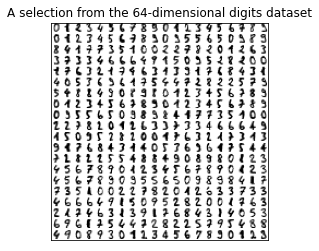

In [1]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

#print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
#from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)
from sklearn import (manifold, datasets)

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

# 10 colors palette from ColowBrewer
#colorPalette = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']

# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    plt.rcParams['figure.figsize'] = [16,9] # setting [width, height] of the plot
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 #color=colorPalette[y[i]],
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

Computing Isomap embedding
Done.


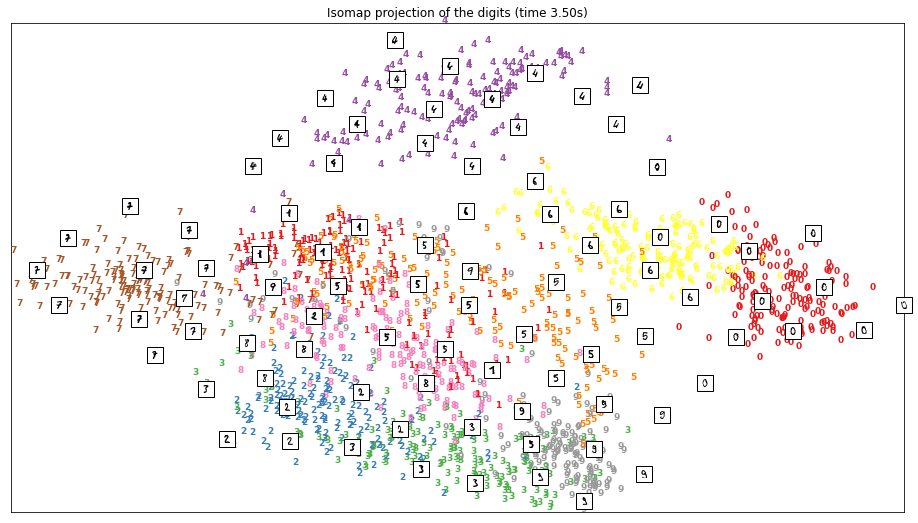

In [2]:
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))